In [1]:
#라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 입지 후보 선정

In [2]:
pool=pd.read_csv('/content/2023_GYM/1122_운영여부반영_위도경도.csv')
pool.head()

,Unnamed: 0,시설명,자치구,시설구분,운영여부,주소,위도,경도
0,0,언북스포츠센터,강남구,학교,1.0,서울 강남구 삼성로135길 42,37.519962,127.045637
1,1,포이스포츠센터,강남구,학교,1.0,서울 강남구 개포로22길 87,37.475524,127.052279
2,3,영희스포츠센터,강남구,학교,1.0,서울 강남구 일원로 21,37.491949,127.081416
3,4,더논현스포츠센터,강남구,학교,1.0,서울 강남구 강남대로120길 33,37.508227,127.026356
4,5,성일스포렉스 피트니스,강동구,학교,1.0,서울 강동구 성내로15길 33,37.528795,127.128275


In [3]:
pool_public=pool[pool['시설구분']=='공공']
pool_private=pool[pool['시설구분']=='민간']
pool_school=pool[pool['시설구분']=='학교']

In [4]:
elementary=pd.read_csv('/content/2023_GYM/modified_elementary_address.csv')

In [5]:
elementary_location = pd.read_csv('/content/2023_GYM/1123_elementary_location.csv')

In [34]:
import folium
import pandas as pd
import urllib.request
import json

# 서울 중심의 지도를 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
urllib.request.urlretrieve(url, "seoul_geo.json")

with open("seoul_geo.json", "r", encoding="utf-8") as file:
    seoul_geo_data = json.load(file)

folium.GeoJson(seoul_geo_data, name='geojson').add_to(seoul_map)

# 데이터프레임의 각 행에 대해 지도에 CircleMarker로 점을 추가
for index, row in pool.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=0.6, popup=row['시설명']).add_to(seoul_map)

# 데이터프레임의 각 행에 대해 지도에 CircleMarker로 점을 추가
for index, row in elementary.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.6, popup=row['학교명']).add_to(seoul_map)

seoul_map

초등학교(빨간색), 수영장(파란색) 시각화 결과를 토대로 입지 후보 5곳 선정

# 분석 과정

## 입지 후보를 기준으로 2km이내에 위치하는 초등학교 수

In [35]:
import folium
import pandas as pd
import urllib.request
import json

# 서울 중심의 지도를 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
urllib.request.urlretrieve(url, "seoul_geo.json")

with open("seoul_geo.json", "r", encoding="utf-8") as file:
    seoul_geo_data = json.load(file)

folium.GeoJson(seoul_geo_data, name='geojson').add_to(seoul_map)


# Add circles for 2km and 5km radii around each school
for index, row in elementary_location.iterrows():
    folium.Circle(location=[row['위도'], row['경도']], radius=5000, color='yellow', fill=True, fill_opacity=0.3, fill_color='yellow').add_to(seoul_map)
    folium.Circle(location=[row['위도'], row['경도']], radius=2000, color='orange', fill=True, fill_opacity=0.3, fill_color='orange').add_to(seoul_map)

# 데이터프레임의 각 행에 대해 지도에 CircleMarker로 점을 추가
for index, row in elementary.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.6, popup=row['학교명']).add_to(seoul_map)
for index, row in elementary_location.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='green', fill=True, fill_color='green', fill_opacity=0.6, popup=row['학교명']).add_to(seoul_map)

seoul_map

## 입지 후보를 기준으로 2km이내에 위치하는 수영장 수

In [37]:
import folium
import pandas as pd
import urllib.request
import json

# 서울 중심의 지도를 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
urllib.request.urlretrieve(url, "seoul_geo.json")

with open("seoul_geo.json", "r", encoding="utf-8") as file:
    seoul_geo_data = json.load(file)

folium.GeoJson(seoul_geo_data, name='geojson').add_to(seoul_map)


# Add circles for 2km and 5km radii around each school
for index, row in elementary_location.iterrows():
    folium.Circle(location=[row['위도'], row['경도']], radius=5000, color='yellow', fill=True, fill_opacity=0.3, fill_color='yellow').add_to(seoul_map)
    folium.Circle(location=[row['위도'], row['경도']], radius=2000, color='orange', fill=True, fill_opacity=0.3, fill_color='orange').add_to(seoul_map)

# 데이터프레임의 각 행에 대해 지도에 CircleMarker로 점을 추가
for index, row in pool_public.iterrows(): #공공 수영장은 파란색
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=0.6, popup=row['시설명']).add_to(seoul_map)
for index, row in pool_private.iterrows(): #민간 수영장은 빨간색
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='red', fill=True, fill_color='red', fill_opacity=0.6, popup=row['시설명']).add_to(seoul_map)
for index, row in pool_school.iterrows(): #학교 수영장은 갈색
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='brown', fill=True, fill_color='brown', fill_opacity=0.6, popup=row['시설명']).add_to(seoul_map)
for index, row in elementary_location.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='green', fill=True, fill_color='green', fill_opacity=0.6, popup=row['학교명']).add_to(seoul_map)

seoul_map

## 입지 후보를 기준으로 가장 가까운 안전센터 거리

In [38]:
safety_center=pd.read_csv('/content/2023_GYM/안전센터관할위치정보.csv')

In [42]:
import folium
import pandas as pd
import urllib.request
import json

# 서울 중심의 지도를 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
urllib.request.urlretrieve(url, "seoul_geo.json")

with open("seoul_geo.json", "r", encoding="utf-8") as file:
    seoul_geo_data = json.load(file)

folium.GeoJson(seoul_geo_data, name='geojson').add_to(seoul_map)

# 데이터프레임의 각 행에 대해 지도에 CircleMarker로 점을 추가
for index, row in safety_center.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='hotpink', fill=True, fill_color='hotpink', fill_opacity=0.6, popup=row['센터명']).add_to(seoul_map)
for index, row in elementary_location.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='green', fill=True, fill_color='green', fill_opacity=0.6, popup=row['학교명']).add_to(seoul_map)

seoul_map

## 입지 후보를 기준으로 가장 가까운 응급실 거리

In [40]:
emergency = pd.read_csv('/content/2023_GYM/응급실위치추출.csv')

In [44]:
import folium
import pandas as pd
import urllib.request
import json

# 서울 중심의 지도를 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
urllib.request.urlretrieve(url, "seoul_geo.json")

with open("seoul_geo.json", "r", encoding="utf-8") as file:
    seoul_geo_data = json.load(file)

folium.GeoJson(seoul_geo_data, name='geojson').add_to(seoul_map)

# 데이터프레임의 각 행에 대해 지도에 CircleMarker로 점을 추가
for index, row in emergency.iterrows():
    folium.CircleMarker(location=[row['병원위도'], row['병원경도']], radius=2, color='purple', fill=True, fill_color='purple', fill_opacity=0.6, popup=row['기관명']).add_to(seoul_map)
for index, row in elementary_location.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=2, color='hotpink', fill=True, fill_color='green', fill_opacity=0.6, popup=row['학교명']).add_to(seoul_map)

seoul_map

## 입지 후보 지역의 치안


In [6]:
crime=pd.read_csv('/content/2023_GYM/대검찰청_범죄발생지_20181231 복사본.csv',encoding='cp949')

In [7]:
crime = crime.drop(crime.columns[26:], axis=1)
child_crime = crime.loc[[9,14,116,117]]
child_crime = child_crime.set_index("범죄분류")
child_crime = child_crime.transpose()
child_crime["성폭력 제외 나머지합"] = child_crime.drop('성폭력', axis=1).sum(axis=1)
child_crime["총합"] = child_crime.sum(axis=1)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

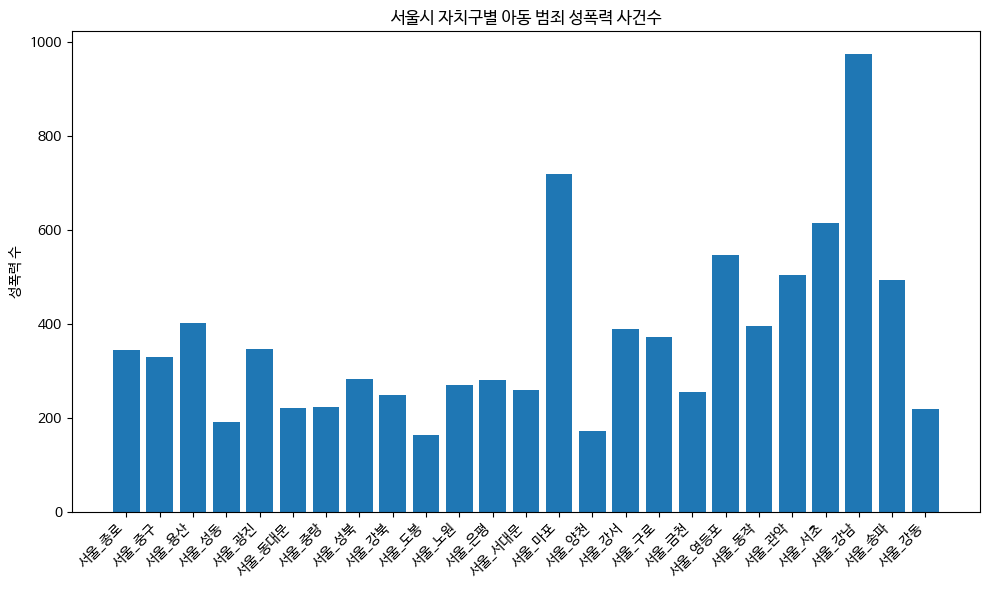

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(child_crime.index,child_crime['성폭력'])

plt.title('서울시 자치구별 아동 범죄 성폭력 사건수')
plt.ylabel('성폭력 수')

# X 축 라벨 기울기 설정
plt.xticks(rotation=45, ha='right')

# 라벨이 겹치지 않도록 조정
plt.tight_layout()

plt.show()

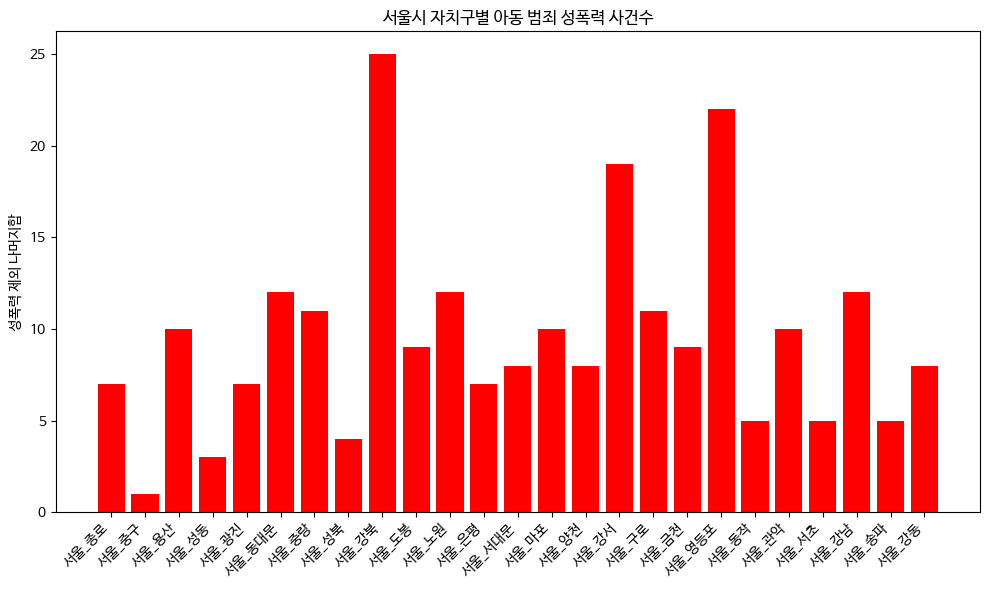

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(child_crime.index,child_crime['성폭력 제외 나머지합'], color='red')

plt.title('서울시 자치구별 아동 범죄 성폭력 사건수')
plt.ylabel('성폭력 제외 나머지합')

# X 축 라벨 기울기 설정
plt.xticks(rotation=45, ha='right')

# 라벨이 겹치지 않도록 조정
plt.tight_layout()

plt.show()

## 입지 후보 지역의 수영 동호회 회원 수

In [13]:
pp=pd.read_csv('/content/2023_GYM//지역별_스포츠_동호회현황_202304.csv')

In [14]:
ss=pp[(pp['CTPRVN_NM']=='서울특별시')&(pp['ITEM_NM']=='수영')]
ss_cnt=ss.groupby(['SIGNGU_NM'])['MBER_CO'].sum().reset_index()
ss_cnt=ss_cnt[ss_cnt['SIGNGU_NM']!='서울특별시 하남시']

In [16]:
#구별 수영동호회 회원수 상위 5개 지역
ss_cnt.sort_values(by='MBER_CO', ascending=False).head()

,SIGNGU_NM,MBER_CO
0,서울특별시 강남구,109
14,서울특별시 송파구,96
2,서울특별시 강서구,63
16,서울특별시 용산구,25
17,서울특별시 은평구,24


In [18]:
ss_cnt[ss_cnt['SIGNGU_NM'].isin(['서울특별시 강동구','서울특별시 금천구','서울특별시 강서구','서울특별시 노원구','서울특별시 도봉구'])][['SIGNGU_NM','MBER_CO']]

,SIGNGU_NM,MBER_CO
1,서울특별시 강동구,9
2,서울특별시 강서구,63
6,서울특별시 노원구,7


## 입지 후보 지역의 인구 수


In [20]:
pp=pd.read_csv('/content/2023_GYM/주민등록인구_20231124015754.csv')

In [21]:
#길동초등학교
gd_pp_sum=pp[pp['동별(3)'].isin(['길동','천호1동','천호3동'])]['2022.1'].astype(int).sum()
gd_area_sum=1.61+0.71+0.79
gd_pp_by_area=gd_pp_sum/gd_area_sum

print('길동초 인근 동 인구수 합:',gd_pp_sum)
print('길동초 인근 동 면적 합:',gd_area_sum)
print('길동초 인근 동 면적 대비 인구수 :',gd_pp_by_area)

길동초 인근 동 인구수 합: 98723
길동초 인근 동 면적 합: 3.1100000000000003
길동초 인근 동 면적 대비 인구수 : 31743.729903536972


In [22]:
#백산초등학교
bs_pp_sum=pp[pp['동별(3)'].isin(['시흥1동','시흥3동','시흥5동'])]['2022.1'].astype(int).sum()
bs_area_sum=1.71+1.07+1.39
bs_pp_by_area=bs_pp_sum/bs_area_sum

print('백산초 인근 동 인구수 합:',bs_pp_sum)
print('백산초 인근 동 면적 합:',bs_area_sum)
print('백산초 인근 동 면적 대비 인구수 :',bs_pp_by_area)

백산초 인근 동 인구수 합: 63997
백산초 인근 동 면적 합: 4.17
백산초 인근 동 면적 대비 인구수 : 15347.002398081535


In [23]:
#화일초등학교
wi_pp_sum=pp[pp['동별(3)'].isin(['화곡본동'])]['2022.1'].astype(int).sum()
wi_area_sum=0.98
wi_pp_by_area=wi_pp_sum/wi_area_sum

print('화일초 인근 동 인구수 합:',wi_pp_sum)
print('화일초 인근 동 면적 합:',wi_area_sum)
print('화일초 인근 동 면적 대비 인구수 :',wi_pp_by_area)

화일초 인근 동 인구수 합: 34121
화일초 인근 동 면적 합: 0.98
화일초 인근 동 면적 대비 인구수 : 34817.34693877551


In [24]:
#온곡초등학교
og_pp_sum=pp[pp['동별(3)'].isin(['상계9동','상계5동'])]['2022.1'].astype(int).sum()
og_area_sum=0.81+1.01
og_pp_by_area=og_pp_sum/og_area_sum

print('온곡초 인근 동 인구수 합:',og_pp_sum)
print('온곡초 인근 동 면적 합:',og_area_sum)
print('온곡초 인근 동 면적 대비 인구수 :',og_pp_by_area)

온곡초 인근 동 인구수 합: 43808
온곡초 인근 동 면적 합: 1.82
온곡초 인근 동 면적 대비 인구수 : 24070.32967032967


In [25]:
#창경초등학교
ck_pp_sum=pp[pp['동별(3)'].isin(['쌍문4동','방학2동'])]['2022.1'].astype(int).sum()
ck_area_sum=0.52+0.74
ck_pp_by_area=ck_pp_sum/ck_area_sum

print('창경초 인근 동 인구수 합:',ck_pp_sum)
print('창경초 인근 동 면적 합:',ck_area_sum)
print('창경초 인근 동 면적 대비 인구수 :',ck_pp_by_area)

창경초 인근 동 인구수 합: 37702
창경초 인근 동 면적 합: 1.26
창경초 인근 동 면적 대비 인구수 : 29922.222222222223


# 입지 선정

In [28]:
df=pd.read_csv('/content/2023_GYM/입지후보.csv', encoding='cp949')
df

,입지후보,2km 이내 초등학교 수,2km 이내 학교 수영장 수,2km 이내 공공 수영장 수,2km 이내 민간 수영장 수,응급실 최단거리,안전센터 최단거리,버스 접근성,면적 대비 인구수,동호회 회원수,치안 등급
0,강동구 서울 길동초등학교,16,1,1,3,1.5,0.359,0.8,31743.7,9,1.5
1,금천구 서울 백산초등학교,12,0,2,0,1.2,1.200,0.8,15347.0,0,3.0
2,강서구 서울 화일초등학교,17,1,3,4,2.3,0.445,0.8,34817.3,63,5.0
3,노원구 서울 온곡초등학교,15,1,2,2,2.5,1.600,1.0,24070.3,7,4.0
4,도봉구 서울 창경초등학교,15,2,2,1,2.0,2.500,1.0,29922.2,0,1.5


In [29]:
#수영장 조정
df['2km 이내 수영장 수']=df['2km 이내 공공 수영장 수']*3+df['2km 이내 학교 수영장 수']*4+df['2km 이내 민간 수영장 수']

In [30]:
#데이터 및 가중치 수정
df=df[['입지후보','2km 이내 초등학교 수','응급실 최단거리', '안전센터 최단거리', '버스 접근성', '면적 대비 인구수',
       '동호회 회원수', '치안 등급', '2km 이내 수영장 수']]

weight={'2km 이내 초등학교 수': 5,
'2km 이내 수영장 수': -4.5,
'응급실 최단거리':  -3.5,
'안전센터 최단거리': -3.5,
'버스 접근성': 3,
'면적 대비 인구수': 1.5,
'동호회 회원수': 2,
'치안 등급': -1.5}

In [31]:
#각 칼럼의 값을 0~1로 스케일 조정하는 민맥스 스케일러 사용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['2km 이내 초등학교 수','2km 이내 수영장 수', '응급실 최단거리', '안전센터 최단거리',
                    '버스 접근성', '면적 대비 인구수', '동호회 회원수', '치안 등급']
data_to_scale = df[columns_to_scale]
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.concat([df[['입지후보']], pd.DataFrame(scaled_data, columns=columns_to_scale)], axis=1)
scaled_df

,입지후보,2km 이내 초등학교 수,2km 이내 수영장 수,응급실 최단거리,안전센터 최단거리,버스 접근성,면적 대비 인구수,동호회 회원수,치안 등급
0,강동구 서울 길동초등학교,0.8,0.363636,0.230769,0.000000,0.0,0.842139,0.142857,0.000000
1,금천구 서울 백산초등학교,0.0,0.000000,0.000000,0.392807,0.0,0.000000,0.000000,0.428571
2,강서구 서울 화일초등학교,1.0,1.000000,0.846154,0.040168,0.0,1.000000,1.000000,1.000000
3,노원구 서울 온곡초등학교,0.6,0.545455,1.000000,0.579636,1.0,0.448031,0.111111,0.714286
4,도봉구 서울 창경초등학교,0.6,0.818182,0.615385,1.000000,1.0,0.748586,0.000000,0.000000


In [32]:
df['최종수치']=sum(scaled_df[col] * weight[col] for col in weight)
df[['입지후보','최종수치']].sort_values(by='최종수치', ascending=False)

<ipython-input-32-8d1cde00898b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['최종수치']=sum(scaled_df[col] * weight[col] for col in weight)


,입지후보,최종수치
0,강동구 서울 길동초등학교,3.104867
2,강서구 서울 화일초등학교,-0.602127
1,금천구 서울 백산초등학교,-2.017682
3,노원구 서울 온곡초등학교,-2.160430
4,도봉구 서울 창경초등학교,-2.212785


최종 입지로 길동초등학교 선정